# HW1: Image processing

In [1]:
import math
from PIL import Image, ImageEnhance, ImageFilter
from skimage.exposure import cumulative_distribution
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import cv2

import warnings
warnings.filterwarnings("ignore")

OXXXY = 'oxxxy.jpeg'
DP = 'danya.jpeg'

1) Histogram Calculation: (3 points)
    
- Calculate and plot the histogram of the image;
- Compute the mean, standard deviation and entropy of the image;
- Interpret the results in terms of image intensity and pores distribution;
- Discuss how the statistics are related to the histogram characteristics.

In [2]:
def plot_hist(img):
    plt.hist(np.array(img).ravel(), bins=500)
    plt.ylabel('frequency')
    plt.xlabel('intensity')
    plt.show()

In [3]:
def entropy2(labels, base=None):
    # your code here
    value,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()
    base = e if base is None else base
    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()#log(a) b=log (c) b÷log (c) a

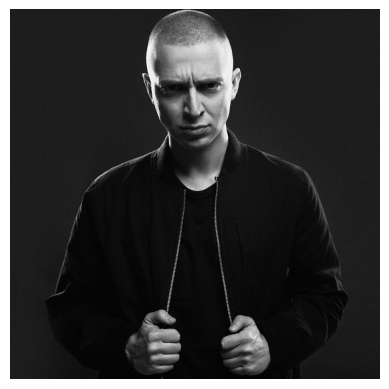

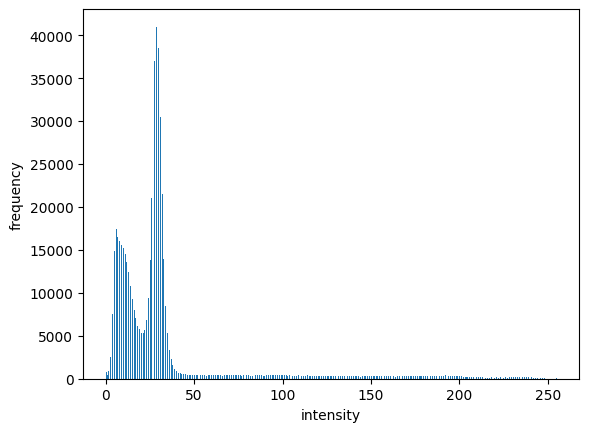

mean of image is 33.595, std is 39.793, entropy is 5.691


In [4]:
# calculate properties and plot histogram
def visulize(image: np.array, dpi: int = 300, cmap: str = "gray",
             axis: bool = False):
    plt.figure(dpi=dpi)
    plt.imshow(image, cmap)
    plt.axis(axis)
    plt.show()

def calculate_properties(image: np.array, base: int = 2):
    mean_value = image.mean()
    std_value = image.std()
    entropy = entropy2(image, base=base)
    print(f'mean of image is {round(mean_value, 3)}, std is {round(std_value, 3)}, entropy is {round(entropy, 3)}')
    
image = cv2.imread(OXXXY, cv2.IMREAD_GRAYSCALE)
visulize(image, dpi = 100)
plot_hist(image)
calculate_properties(image)

### Result interpretation in terms of image intensity and pores distribution

1. There is two explicit histogram peakes -- this can be interpreted as approximately three domination types of materials.
* First of all, the one that is closer to zero can be interpreted as pores (probably in this photo this is not a backgroung, this is oxxxy jacket, because it is really black).
* Then there is a second material (in current image this is a background) -- can be interpreted in digital core physics terms as domination mineral (like a quartz in sandstones or something else).
* The last type of material -- "other" material - wide specter of small including of mineral (this is human skin in a photo)

2. We can say that the gray intensity spectrum is very wide judging by this histogram. There are pixels with an intensity from 0 to 255. But most of the pixels are located on the left side of the histogram, which indicates an explicit porosity of the sample and a large content of non-contrasting dominant mineral.

### Result

In terms of image intensity, the mean value of 33.595 suggests that the overall brightness of the grayscale image is relatively low. On average, the pixel intensities tend to be closer to the lower end of the intensity range.

The standard deviation of 39.793 indicates how much the pixel intensities vary from the mean. A higher standard deviation suggests a wider distribution of intensities and a greater range of brightness values in the image. In this case, the relatively high standard deviation implies that there is a significant variation in pixel intensities, ranging from darker to brighter regions.

The entropy value of 5.691 represents the amount of information or randomness in the image. Higher entropy indicates a more complex distribution of intensities and a greater diversity of pore sizes and shapes in the image. In this context, it suggests that the image contains a diverse distribution of pores, possibly with different sizes, orientations, or textures.

The statistics (mean, standard deviation, and entropy) are related to the histogram characteristics in the following ways:

1. Mean: The mean value corresponds to the central tendency of the pixel intensities and can be visualized as the peak or center of the histogram. If the mean is towards the lower end of the intensity range, as in this case, the histogram is likely to have a peak towards the darker range.

2. Standard Deviation: The standard deviation provides information about the spread or dispersion of the pixel intensities. A larger standard deviation results in a wider histogram distribution, indicating a greater range of intensity values.

3. Entropy: Entropy measures the uncertainty or randomness of the pixel intensities. In terms of the histogram, higher entropy implies that the histogram is more evenly distributed across different intensity values, indicating a greater diversity of pore sizes or variations in the image.

Overall, the statistics provide insights into the overall intensity level, variation, and diversity of pores in the grayscale image, while the histogram complements this information by visually representing the frequency of intensities and their distribution.

3) Thresholding: (2 points)
    
- Apply basic thresholding with 5 thresholds.

In [5]:
def plot_image(image, title=''):
    pylab.title(title, size=12), pylab.imshow(image, cmap='gray')
    pylab.axis('off') # comment this line if you want axis ticks
    
def thresholding(thresholds, img):
    # your code here
    plt.figure(figsize=(20,20))
    imgs = []
    for i in range(len(thresholds)):
        im1 = img.point(lambda x: x > thresholds[i])
        imgs.append(im1)
        pylab.subplot(len(thresholds),1,i+1), plot_image(im1, 'binary image with threshold=' + str(thresholds[i]))
    pylab.show()
    return imgs

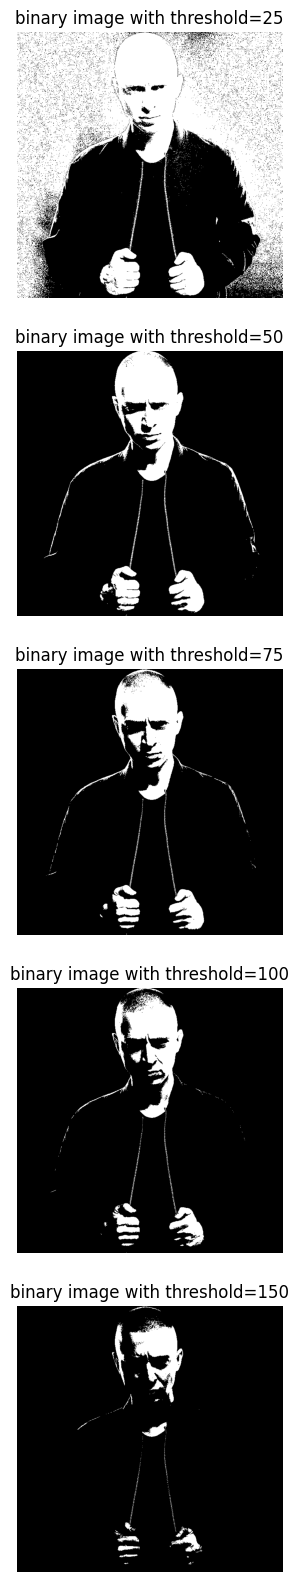

In [6]:
image = Image.open(OXXXY).convert('L')
ths = [25, 50, 75, 100, 150]
thresholding(ths, image);

4) half-toning: (5 points)
- add half-toning for improvement of contures visability after binarization (you can use noise from discrete uniform distribution)
- apply noise reduction techniques (linear/non-linear methods) and conclude which denoising technique is the best for core image, use these techniques:
    - box filter
    - Gaussian filter
    - median filter
    - non-local means filter

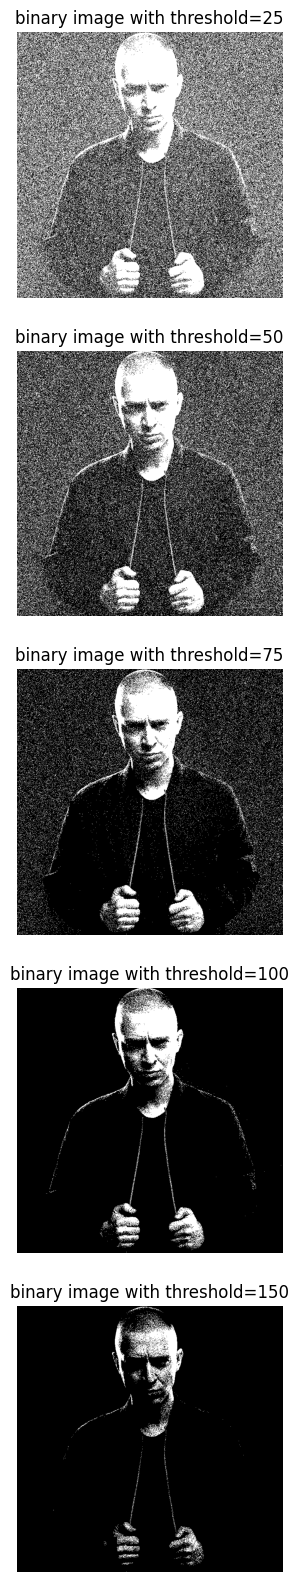

In [7]:
# your code here

noise_level = 64 # default: 128

noisy_image = Image.fromarray(np.clip(image + np.random.randint(-noise_level, noise_level,(image.height, image.width)),
                                      0, 255).astype(np.uint8))

noisy_images = thresholding(ths, noisy_image);

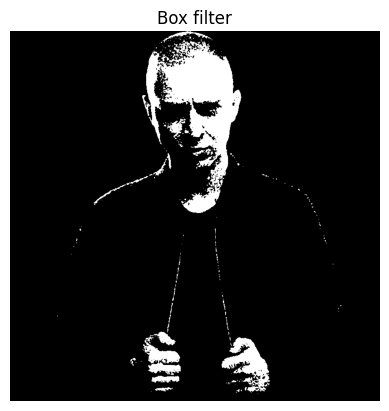

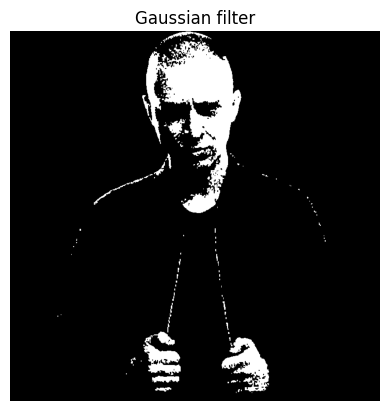

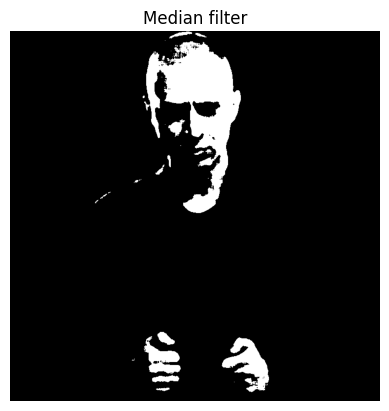

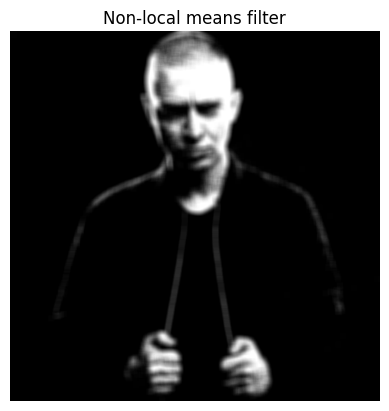

In [8]:
## box 
def box_filter(image: np.array, wsize: int = 3):
    # Apply a box filter
    filtered_image = cv2.boxFilter(np.array(image),-1,(wsize, wsize))
    plot_image(filtered_image, 'Box filter')
    pylab.show()
    return filtered_image

## gaussian
def gaussian_filter(image: np.array, wsize: int = 2):
    filtered_image = np.array(image.filter(ImageFilter.GaussianBlur(wsize)))
    plot_image(filtered_image, 'Gaussian filter')
    pylab.show()
    return filtered_image

## median
def median_filter(image: np.array, wsize: int = 7):
    filtered_image = np.array(image.filter(ImageFilter.MedianFilter(wsize)))
    plot_image(filtered_image, 'Median filter')
    pylab.show()
    return filtered_image

## non-local means
def nlm_filter(image: np.array):
    sigma_est = np.mean(estimate_sigma(np.array(image), multichannel=False))
    patch_kw = dict(patch_size=5, # 5x5 patches
                    patch_distance=6, # 13x13 search area
                    multichannel=False)
    denoise = denoise_nl_means(np.array(image), h=1.15 * sigma_est, fast_mode=False, **patch_kw)
    plot_image(denoise, 'Non-local means filter')
    pylab.show()
    return denoise

filters = [box_filter, gaussian_filter, median_filter, nlm_filter]
for filter in filters:
    filter(noisy_images[3])

### What's filter the best choice for core microCT image processing? (my observation)

*small theory including*

Linear methods, such as the box filter and Gaussian filter, work by convolving the image with a kernel that averages the pixel values in the neighborhood of each pixel. The box filter is a simple averaging filter that replaces each pixel with the average of its neighboring pixels. The Gaussian filter is a more sophisticated filter that uses a weighted average to give more weight to nearby pixels and less weight to distant pixels. Both of these filters are effective at reducing Gaussian noise, which is a type of noise that is characterized by a normal distribution.

Non-linear methods, such as the median filter and non-local means filter, work by replacing each pixel with a value that is derived from the values of its neighboring pixels. The median filter replaces each pixel with the median value of its neighboring pixels, which is effective at reducing salt-and-pepper noise, which is a type of noise that is characterized by isolated pixels with very high or very low values. The non-local means filter is a more sophisticated filter that replaces each pixel with a weighted average of the pixels in the image that are most similar to it. This filter is effective at reducing both Gaussian noise and salt-and-pepper noise.

*my observation*

I think that more complex, sophisticated technics can be better choicew for digital core image processing. I see three reasons:

* when mCT images shooting, we get more than just simple Gauussian noise in the image. We have a lot of other artifacts due to the physics of the process of shooting microCT images like beam hardering and others. That means that more complex algorithms, which can deal with more complex noise than Gaussian, are winners;

* if we calculated SNR we can see that NLM is better (probably); 

* from the lecture we know that NLM is the good choice for core sample images.

5) Histogram processing: (5 points)
    
- Apply contrast stretching, histogram equalization and adaptive histogram equalization

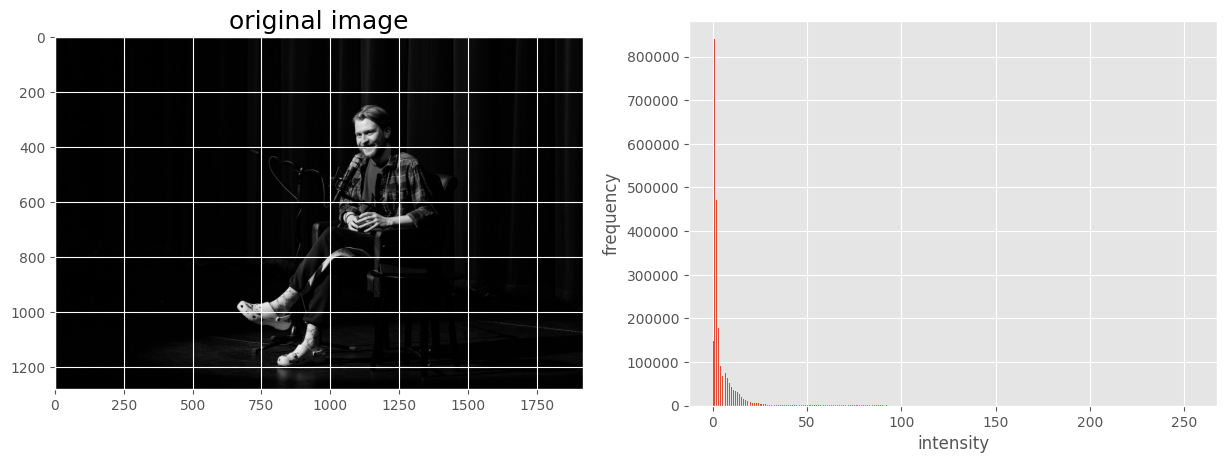

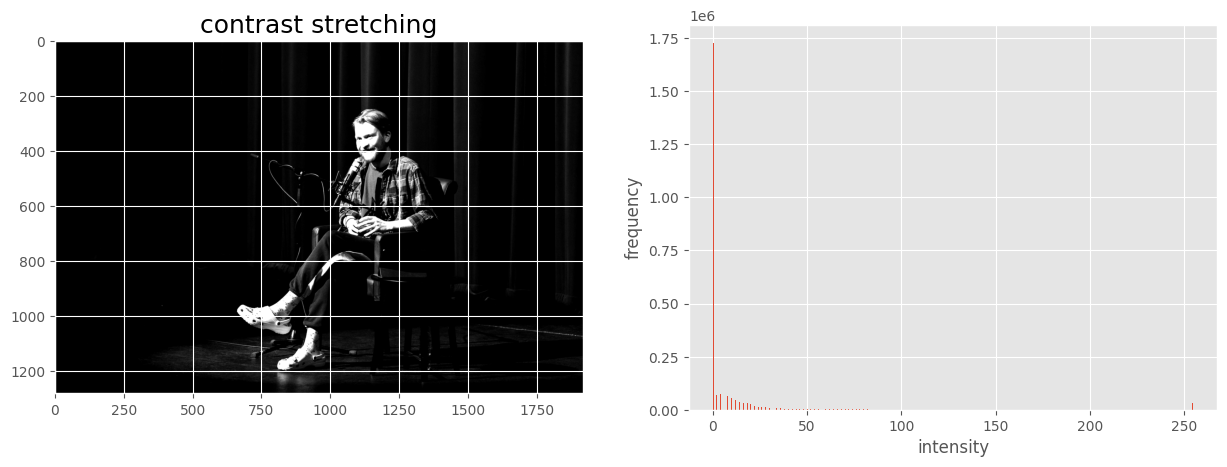

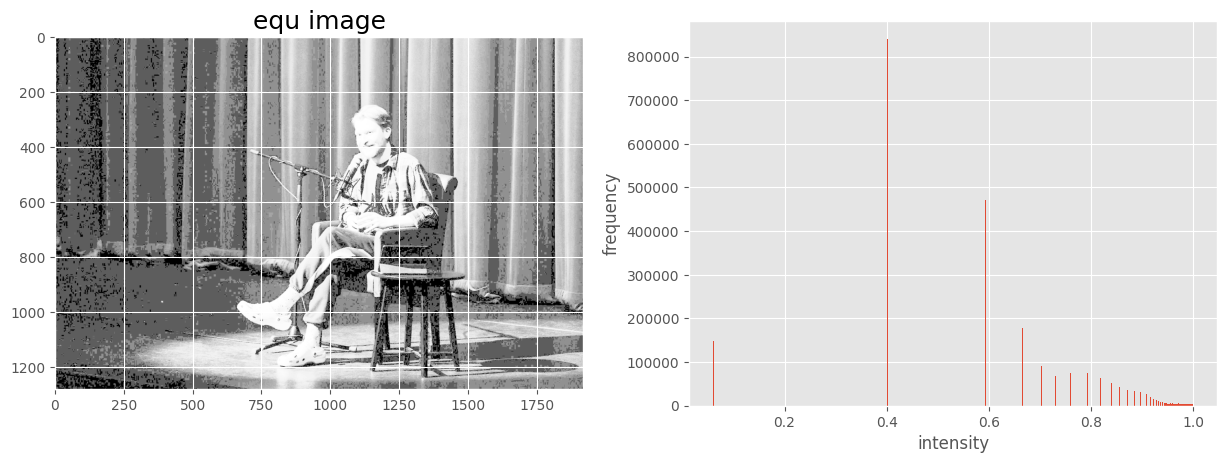

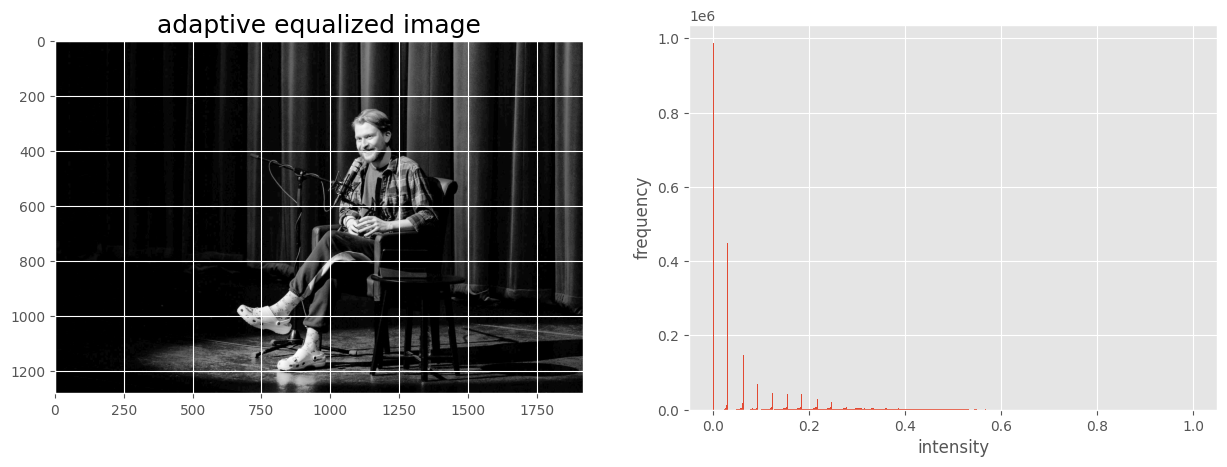

In [9]:
# your code here
image = Image.open(DP).convert('L')

def plot_img_and_hist(img, img_name=''):
    pylab.style.use('ggplot')
    pylab.figure(figsize=(15,5))
    pylab.subplot(121), pylab.imshow(img, cmap='gray'), pylab.title(img_name, size=18)
    pylab.subplot(122), plot_hist(img),# pylab.yscale('log',basey=10)
    pylab.show()

contrast = ImageEnhance.Contrast(image)
im_contr_str = np.reshape(np.array(contrast.enhance(2).getdata()).astype(np.uint8), (image.height, image.width)) 

img = np.array(image)
img_eq = exposure.equalize_hist(img)
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)


plot_img_and_hist(image, 'original image')
plot_img_and_hist(im_contr_str, 'contrast stretching')
plot_img_and_hist(img_eq, 'equ image')
plot_img_and_hist(img_adapteq, 'adaptive equalized image')